# Kaggle Air Quality Prediction: EDA
---
Goal of the notebook: EDA

Inputs of the notebook:

Output of the notebook:


Takeaways:

Questions, thoughts and remarks:

## Imports

In [5]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Data

In [6]:
df = pd.read_csv("../data/train.csv")
df = df.set_index("id")
df.index = pd.to_datetime(df.index)
df

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
id,,,,,
2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4
2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0
2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9
2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1
2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6
...,...,...,...,...,...
2024-09-03 18:00:00,NaN,0.222,55.1,12.0,5.3
2024-09-03 19:00:00,NaN,0.245,48.2,13.4,7.0
2024-09-03 20:00:00,NaN,0.234,44.5,12.4,7.1


In [7]:
df.describe()

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
count,37694.000000,28462.000000,40298.000000,33824.000000,39200.000000
mean,21.831528,0.200710,50.574349,18.221523,11.051161
std,14.658381,0.103691,26.488626,11.282385,8.151742
min,1.100000,0.037000,-1.900000,0.500000,0.000000
25%,11.300000,0.145000,33.000000,10.700000,5.800000
50%,17.600000,0.177000,50.700000,15.600000,8.700000
75%,28.200000,0.226000,66.600000,22.900000,13.600000
max,131.000000,4.309000,193.100000,128.500000,111.100000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40991 entries, 2020-01-01 00:00:00 to 2024-09-03 22:00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   valeur_NO2   37694 non-null  float64
 1   valeur_CO    28462 non-null  float64
 2   valeur_O3    40298 non-null  float64
 3   valeur_PM10  33824 non-null  float64
 4   valeur_PM25  39200 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


There are quite some missing values.

## 2. Plot Time Series

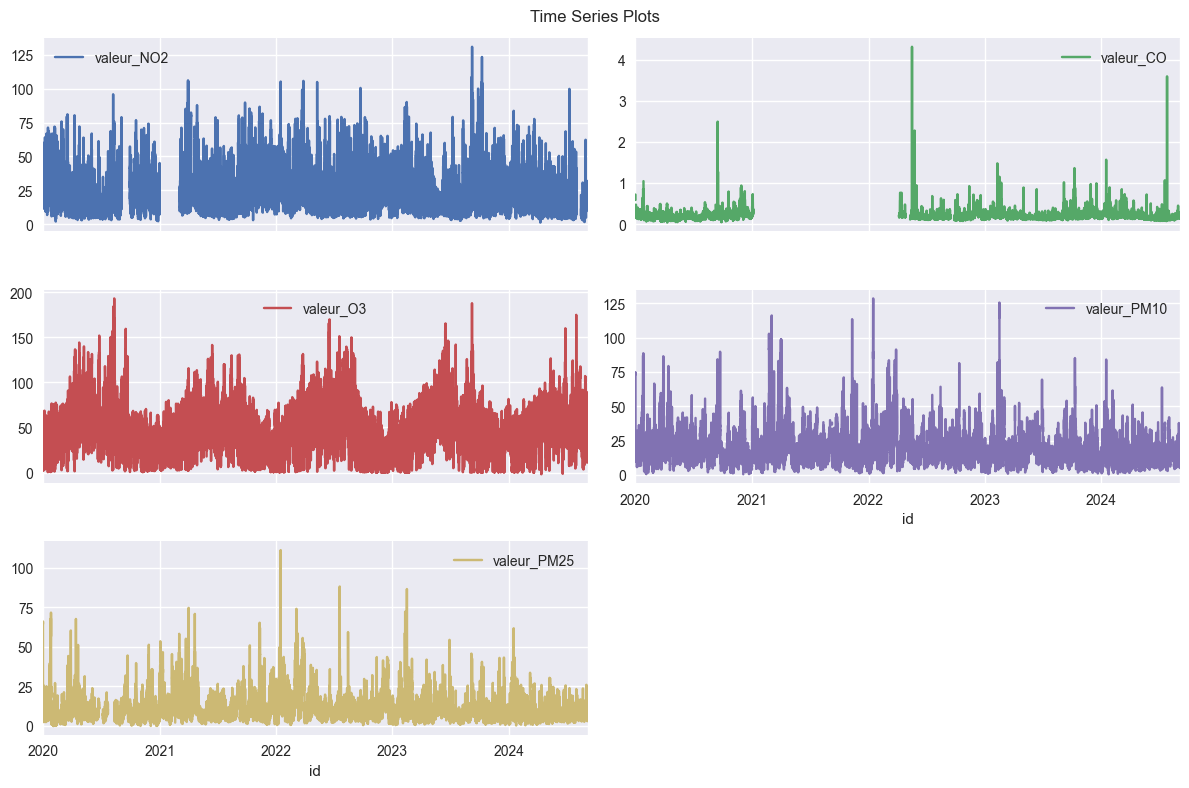

In [24]:
import matplotlib.pyplot as plt

# Set pyplot style
plt.style.use("seaborn-v0_8")

# Define grid layout (e.g., 2 rows, 2 columns for 4 plots; adjust as needed)
n_rows = 3
n_cols = 2

# Plot each column in a grid layout
df.plot(
    subplots=True,
    layout=(n_rows, n_cols),
    figsize=(12, 8),
    sharex=True,
    title="Time Series Plots",
)

# Display the plots
plt.tight_layout()
plt.show()

## 3. Impute Missing Values

In [26]:
cols_to_impute = ["valeur_NO2", "valeur_CO", "valeur_O3", "valeur_PM10", "valeur_PM25"]

In [ ]:
# Imputers

import numpy as np
import pandas as pd

np.random.seed(1234)
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker

tab10 = plt.get_cmap("tab10")

from qolmat.benchmark import comparator, missing_patterns
from qolmat.imputations import imputers
from qolmat.utils import data, plot
from sklearn.linear_model import LinearRegression

imputer_mean = imputers.ImputerMean(strategy="median")
imputer_interpol = imputers.ImputerInterpolation(method="linear")
imputer_residuals = imputers.ImputerResiduals(
    period=24,
    model_tsa="additive",
    extrapolate_trend="freq",
    method_interpolation="linear",
)

## NEED OTHER VARIABLES ?
# imputer_tsou = imputers.ImputerEM(
#     groups=("station",),
#     model="VAR",
#     method="sample",
#     max_iter_em=30,
#     n_iter_ou=15,
#     dt=1e-3,
#     p=1,
# )
# imputer_mice = imputers.ImputerMICE(
#     groups=("station",),
#     estimator=LinearRegression(),
#     sample_posterior=False,
#     max_iter=100,
# )

dict_imputers = {
    # "median": imputer_median,
    "interpolation": imputer_interpol,
    "residuals": imputer_residuals,
    # "TSOU": imputer_tsou,
    # "mice": imputer_mice,
}
n_imputers = len(dict_imputers)

comparison = comparator.Comparator(
    dict_imputers,
    cols_to_impute,
    generator_holes=generator_holes,
    metrics=["mae", "wmape", "KL_columnwise", "wasserstein_columnwise"],
    max_evals=10,
)
results = comparison.compare(df)
results.style.highlight_min(color="lightsteelblue", axis=1)